In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sys import path
%matplotlib inline

In [37]:
train = pd.read_csv('C:/Users/lee/Desktop/핀테크/4. 금융분석모델링/프로젝트/cs-training.csv')
test = pd.read_csv('C:/Users/lee/Desktop/핀테크/4. 금융분석모델링/프로젝트/cs-test.csv')
df = pd.concat([train, test], ignore_index=1)

In [38]:
mask = df['SeriousDlqin2yrs'].notnull()#notnull()는 관측치가 결측이면 False, 결측이 아니면 True를 반환

In [61]:
mask

0          True
1          True
2          True
3          True
4          True
5          True
6          True
7          True
8          True
9          True
10         True
11         True
12         True
13         True
14         True
15         True
16         True
17         True
18         True
19         True
20         True
21         True
22         True
23         True
24         True
25         True
26         True
27         True
28         True
29         True
          ...  
251473    False
251474    False
251475    False
251476    False
251477    False
251478    False
251479    False
251480    False
251481    False
251482    False
251483    False
251484    False
251485    False
251486    False
251487    False
251488    False
251489    False
251490    False
251491    False
251492    False
251493    False
251494    False
251495    False
251496    False
251497    False
251498    False
251499    False
251500    False
251501    False
251502    False
Name: SeriousDlqin2yrs, 

In [39]:
df.shape

(251503, 12)

In [40]:
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1.0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0.0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0.0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0.0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0.0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [41]:
df = df.drop('Unnamed: 0', axis=1)

In [42]:
df.SeriousDlqin2yrs.mean()

0.06684

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251503 entries, 0 to 251502
Data columns (total 11 columns):
SeriousDlqin2yrs                        150000 non-null float64
RevolvingUtilizationOfUnsecuredLines    251503 non-null float64
age                                     251503 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    251503 non-null int64
DebtRatio                               251503 non-null float64
MonthlyIncome                           201669 non-null float64
NumberOfOpenCreditLinesAndLoans         251503 non-null int64
NumberOfTimes90DaysLate                 251503 non-null int64
NumberRealEstateLoansOrLines            251503 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    251503 non-null int64
NumberOfDependents                      244953 non-null float64
dtypes: float64(5), int64(6)
memory usage: 21.1 MB


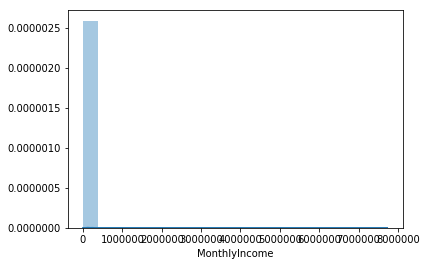

In [50]:
sns.distplot(df[df['MonthlyIncome'].notnull()]['MonthlyIncome'],bins=20)

In [51]:
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(df.MonthlyIncome.median())#MonthlyIncome의 결측값을 MonthlyIncome의 중앙값으로 대체

In [67]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1.0,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0.0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0.0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0.0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0.0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [52]:
df.MonthlyIncome.median()

5400.0

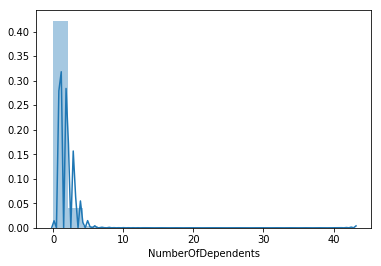

In [60]:
sns.distplot(df[df['NumberOfDependents'].notnull()]['NumberOfDependents'],
            bins=20)

In [12]:
df['NumberOfDependents'] = df['NumberOfDependents'].fillna(df.NumberOfDependents.mean())#NumberOfDependents의 평균으로 대체

In [34]:
df.NumberOfDependents.mean()

0.7619951582548129

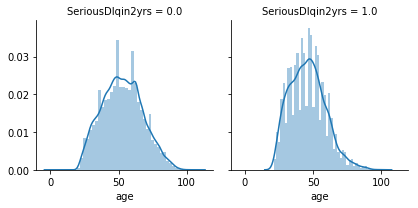

In [13]:
g = sns.FacetGrid(df[mask], col='SeriousDlqin2yrs')#해당칼럼 값에 따라 그래프를 그림
g.map(sns.distplot, 'age')

In [14]:
bins = np.arange(0, 120, 10)
df['age_grouped'] = pd.cut(df['age'], bins, right=0)
gb = df[mask].groupby('age_grouped')['SeriousDlqin2yrs']
pd.concat([gb.count(), gb.mean()], axis=1) # age를 그룹화하고 SeriousDlqin2yrs의 값의 빈도, 평균을 기록.

,SeriousDlqin2yrs,SeriousDlqin2yrs
age_grouped,,
"[0, 10)",1,0.000000
"[10, 20)",0,NaN
"[20, 30)",8820,0.117347
"[30, 40)",23183,0.100720
"[40, 50)",34377,0.083719
"[50, 60)",35301,0.064531
"[60, 70)",28905,0.036326
"[70, 80)",13601,0.024336
"[80, 90)",5125,0.020488


In [15]:
bins = [0, 30, 40, 50, 60, 70, 110]
labels = ['0-29', '30-39', '40-49', '50-59', '60-69', '70+']
df['age_grouped'] = pd.cut(df['age'], bins, right=0, labels=labels)
gb = df[mask].groupby('age_grouped')['SeriousDlqin2yrs']
pd.concat([gb.count(), gb.mean()], axis=1)

,SeriousDlqin2yrs,SeriousDlqin2yrs
age_grouped,,
0-29,8821,0.117334
30-39,23183,0.100720
40-49,34377,0.083719
50-59,35301,0.064531
60-69,28905,0.036326
70+,19413,0.023180


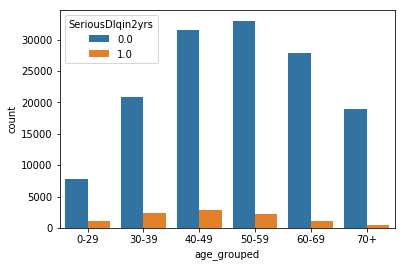

In [16]:
sns.countplot(data=df, x='age_grouped', hue='SeriousDlqin2yrs')

In [17]:
df[['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio']].describe()

,RevolvingUtilizationOfUnsecuredLines,DebtRatio
count,251503.000000,251503.000000
mean,5.750415,349.562468
std,229.633980,1884.792016
min,0.000000,0.000000
25%,0.029977,0.174330
50%,0.153575,0.365612
75%,0.561293,0.861754
max,50708.000000,329664.000000


In [18]:
bins = [0, 0.15, 0.30, 0.45, 0.60, 0.75, 0.90, 1.05, 
       df['RevolvingUtilizationOfUnsecuredLines'].max()]
labels = ['0-0.15', '0.15-0.30', '0.30-0.45', '0.45-0.60', '0.60-0.75', '0.75-0.90', '0.90-1.05', '1.05+']
# 以上分组是测试过多次的结果,测试过程这里省略
df['ru_grouped'] = pd.cut(df['RevolvingUtilizationOfUnsecuredLines'], bins, right=0, labels=labels)
gb = df[mask].groupby('ru_grouped')['SeriousDlqin2yrs']
pd.concat([gb.count(), gb.mean()], axis=1)

,SeriousDlqin2yrs,SeriousDlqin2yrs
ru_grouped,,
0-0.15,74322,0.019133
0.15-0.30,18560,0.034429
0.30-0.45,12469,0.057182
0.45-0.60,9418,0.079529
0.60-0.75,7707,0.111327
0.75-0.90,7454,0.155353
0.90-1.05,18144,0.205026
1.05+,1925,0.398442


In [19]:
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 5.0, 10.0, 20.0, 50.0, 100,
       df['DebtRatio'].max()]
df['dr_grouped'] = pd.cut(df['DebtRatio'], bins, right=0)
gb = df[mask].groupby('dr_grouped')['SeriousDlqin2yrs']
pd.concat([gb.count(), gb.mean()], axis=1)

,SeriousDlqin2yrs,SeriousDlqin2yrs
dr_grouped,,
"[0.0, 0.1)",24520,0.059299
"[0.1, 0.2)",17767,0.063601
"[0.2, 0.3)",20273,0.053766
"[0.3, 0.4)",18008,0.059251
"[0.4, 0.5)",13134,0.069590
"[0.5, 0.6)",8393,0.088407
"[0.6, 0.7)",5426,0.095651
"[0.7, 0.8)",3398,0.110065
"[0.8, 0.9)",2199,0.111869


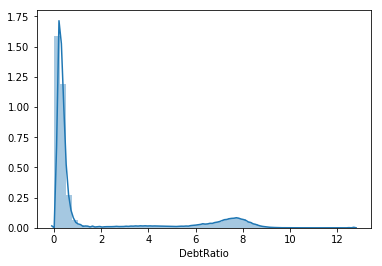

In [20]:
sns.distplot(df['DebtRatio'].apply(np.log1p))

In [21]:
df['dr_log'] = df['DebtRatio'].apply(np.log1p)
bins = [0, 0.3, 0.6, 1.0, 3.0,  
       df['dr_log'].max()]
labels = ['0-0.3', '0.3-0.6', '0.6-1.0', '1.0-3.0', '3.0+']
# 以上分组同样是测试过多次的结果,测试过程省略
df['dr_grouped'] = pd.cut(df['dr_log'], bins, right=0, labels=labels)
gb = df[mask].groupby('dr_grouped')['SeriousDlqin2yrs']
pd.concat([gb.count(), gb.mean()], axis=1)

,SeriousDlqin2yrs,SeriousDlqin2yrs
dr_grouped,,
0-0.3,72035,0.058138
0.3-0.6,39438,0.080379
0.6-1.0,6956,0.124497
1.0-3.0,3620,0.063260
3.0+,27950,0.056279


In [22]:
pd_cols = ['NumberOfTime30-59DaysPastDueNotWorse',
          'NumberOfTime60-89DaysPastDueNotWorse',
          'NumberOfTimes90DaysLate']
df[pd_cols].describe()

,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate
count,251503.000000,251503.000000,251503.000000
mean,0.434245,0.252466,0.278370
std,4.335643,4.299204,4.312539
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,98.000000,98.000000,98.000000


In [23]:
df[pd_cols][df[pd_cols]!=0].count()/df.count().max()

NumberOfTime30-59DaysPastDueNotWorse    0.160217
NumberOfTime60-89DaysPastDueNotWorse    0.050624
NumberOfTimes90DaysLate                 0.055888
dtype: float64

In [24]:
df[pd_cols].corr()

,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate
NumberOfTime30-59DaysPastDueNotWorse,1.000000,0.987799,0.984524
NumberOfTime60-89DaysPastDueNotWorse,0.987799,1.000000,0.993378
NumberOfTimes90DaysLate,0.984524,0.993378,1.000000


In [25]:
df['pd_90+'] = (df['NumberOfTimes90DaysLate']>0).astype(int)
df.groupby('pd_90+')['SeriousDlqin2yrs'].mean()

pd_90+
0    0.046265
1    0.416407
Name: SeriousDlqin2yrs, dtype: float64

In [26]:
df['MonthlyIncome'].describe()

count    2.515030e+05
mean     6.478350e+03
std      2.303541e+04
min      0.000000e+00
25%      3.900000e+03
50%      5.400000e+03
75%      7.385000e+03
max      7.727000e+06
Name: MonthlyIncome, dtype: float64

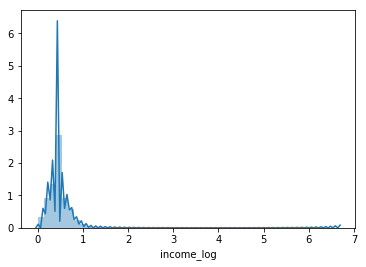

In [27]:
df['income_log'] = (df['MonthlyIncome']/10000).apply(np.log1p)
sns.distplot(df['income_log'])

In [28]:
num_cols = ['NumberOfOpenCreditLinesAndLoans', 'NumberRealEstateLoansOrLines']
df[num_cols].describe()

,NumberOfOpenCreditLinesAndLoans,NumberRealEstateLoansOrLines
count,251503.000000,251503.000000
mean,8.453064,1.016155
std,5.145194,1.121935
min,0.000000,0.000000
25%,5.000000,0.000000
50%,8.000000,1.000000
75%,11.000000,2.000000
max,85.000000,54.000000


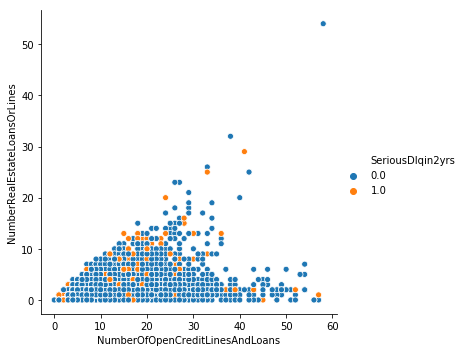

In [29]:
sns.relplot(data=df, x=num_cols[0], y=num_cols[1], hue='SeriousDlqin2yrs')

In [30]:
bins = [0, 2, 4, 6, 10, 14,
       df['NumberOfOpenCreditLinesAndLoans'].max()]
labels = ['0-1', '2-3', '4-5', '6-9', '10-13', '14+']
df['num_oc_grouped'] = pd.cut(df['NumberOfOpenCreditLinesAndLoans'], bins, right=0, labels=labels)
gb = df[mask].groupby('num_oc_grouped')['SeriousDlqin2yrs']
pd.concat([gb.count(), gb.mean()], axis=1)

,SeriousDlqin2yrs,SeriousDlqin2yrs
num_oc_grouped,,
0-1,6326,0.168985
2-3,15724,0.082104
4-5,24540,0.063651
6-9,50776,0.054573
10-13,30617,0.058660
14+,22017,0.069810


In [31]:
bins = [0, 1, 3, 
       df['NumberRealEstateLoansOrLines'].max()]
labels = ['0', '1-2', '3+']
df['num_re_grouped'] = pd.cut(df['NumberRealEstateLoansOrLines'], bins, right=0, labels=labels)
gb = df[mask].groupby('num_re_grouped')['SeriousDlqin2yrs']
pd.concat([gb.count(), gb.mean()], axis=1)

,SeriousDlqin2yrs,SeriousDlqin2yrs
num_re_grouped,,
0,56188,0.083149
1-2,83860,0.053816
3+,9951,0.084514


In [32]:
bins = [0, 1, 2, 4, 
       df['NumberOfDependents'].max()]
labels = ['0', '1', '2-3', '4+']
df['num_dep_grouped'] = pd.cut(df['NumberOfDependents'], bins, right=0, labels=labels)
gb = df[mask].groupby('num_dep_grouped')['SeriousDlqin2yrs']
pd.concat([gb.count(), gb.mean()], axis=1)

,SeriousDlqin2yrs,SeriousDlqin2yrs
num_dep_grouped,,
0,90826,0.058067
1,26316,0.073529
2-3,29005,0.083468
4+,3853,0.102777


In [33]:
df1 = df.drop(['RevolvingUtilizationOfUnsecuredLines',
              'age',
              'DebtRatio',
              'MonthlyIncome',
              'NumberOfDependents',
              'dr_log']
              + num_cols + pd_cols, axis=1)
df1.columns

Index(['SeriousDlqin2yrs', 'age_grouped', 'ru_grouped', 'dr_grouped', 'pd_90+',
       'income_log', 'num_oc_grouped', 'num_re_grouped', 'num_dep_grouped'],
      dtype='object')

In [62]:
df2 = pd.get_dummies(df1, drop_first=True)
df2.columns

Index(['SeriousDlqin2yrs', 'pd_90+', 'income_log', 'age_grouped_30-39',
       'age_grouped_40-49', 'age_grouped_50-59', 'age_grouped_60-69',
       'age_grouped_70+', 'ru_grouped_0.15-0.30', 'ru_grouped_0.30-0.45',
       'ru_grouped_0.45-0.60', 'ru_grouped_0.60-0.75', 'ru_grouped_0.75-0.90',
       'ru_grouped_0.90-1.05', 'ru_grouped_1.05+', 'dr_grouped_0.3-0.6',
       'dr_grouped_0.6-1.0', 'dr_grouped_1.0-3.0', 'dr_grouped_3.0+',
       'num_oc_grouped_2-3', 'num_oc_grouped_4-5', 'num_oc_grouped_6-9',
       'num_oc_grouped_10-13', 'num_oc_grouped_14+', 'num_re_grouped_1-2',
       'num_re_grouped_3+', 'num_dep_grouped_1', 'num_dep_grouped_2-3',
       'num_dep_grouped_4+'],
      dtype='object')

In [65]:
X0 = df2[df['SeriousDlqin2yrs']==0].drop('SeriousDlqin2yrs', axis=1).values
X1 = df2[df['SeriousDlqin2yrs']==1].drop('SeriousDlqin2yrs', axis=1).values
y0 = df2[df['SeriousDlqin2yrs']==0]['SeriousDlqin2yrs'].values
y1 = df2[df['SeriousDlqin2yrs']==1]['SeriousDlqin2yrs'].values
print(X0.shape, X1.shape, y0.shape, y1.shape)

(139974, 28) (10026, 28) (139974,) (10026,)


In [64]:
X1_upsample = np.ndarray(X0.shape)
y1_upsample = np.ndarray(y0.shape)
for i in np.arange(len(y0)):
    idx = np.random.randint(0, y1.shape[0])
    X1_upsample[i] = (X1[idx])
    y1_upsample[i] = (y1[idx])
print(X1_upsample.shape, y1_upsample.shape)

(139974, 28) (139974,)


In [66]:
X = np.concatenate([X0, X1_upsample])
y = np.concatenate([y0, y1_upsample])
print(X.shape, y.shape)

(279948, 28) (279948,)
